In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os


In [5]:
data = pd.read_csv('../data/Math-Students.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      399 non-null    object
 1   sex         399 non-null    object
 2   age         399 non-null    int64 
 3   address     399 non-null    object
 4   famsize     399 non-null    object
 5   Pstatus     399 non-null    object
 6   Medu        399 non-null    int64 
 7   Fedu        399 non-null    int64 
 8   Mjob        399 non-null    object
 9   Fjob        399 non-null    object
 10  reason      399 non-null    object
 11  guardian    399 non-null    object
 12  traveltime  399 non-null    int64 
 13  studytime   399 non-null    int64 
 14  failures    399 non-null    int64 
 15  schoolsup   399 non-null    object
 16  famsup      399 non-null    object
 17  paid        399 non-null    object
 18  activities  399 non-null    object
 19  nursery     399 non-null    object
 20  higher    

In [15]:
print('Number of duplicate rows:', data.duplicated().sum())
print('Number of missing values:', data.isnull().sum().sum())


Number of duplicate rows: 0
Number of missing values: 0


In [17]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [14]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,16.709273,2.761905,2.536341,1.443609,2.035088,0.330827,3.954887,3.233083,3.097744,1.476190,2.288221,3.558897,5.651629,10.879699,10.676692,10.380952
std,1.278225,1.096340,1.092716,0.695429,0.835020,0.740655,0.898335,0.994107,1.113178,0.887552,1.281737,1.384013,7.983113,3.315195,3.760845,4.571073
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.500000,8.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.500000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.500000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


We see data.describe only show data with int value. we need to see data with object value to understand more about the student status.

In [35]:
# Lấy danh sách tên các cột có kiểu object
object_columns = data.select_dtypes(include='object').columns.tolist()
print("Các cột có kiểu object là:")
print(object_columns)

for col in object_columns:
    print(f"\n{col} - unique values: {data[col].unique()}")


Các cột có kiểu object là:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

school - unique values: ['GP' 'MS']

sex - unique values: ['F' 'M']

address - unique values: ['U' 'R']

famsize - unique values: ['GT3' 'LE3']

Pstatus - unique values: ['A' 'T']

Mjob - unique values: ['at_home' 'health' 'other' 'services' 'teacher']

Fjob - unique values: ['teacher' 'other' 'services' 'health' 'at_home']

reason - unique values: ['course' 'other' 'home' 'reputation']

guardian - unique values: ['mother' 'father' 'other']

schoolsup - unique values: ['yes' 'no']

famsup - unique values: ['no' 'yes']

paid - unique values: ['no' 'yes']

activities - unique values: ['no' 'yes']

nursery - unique values: ['yes' 'no']

higher - unique values: ['yes' 'no']

internet - unique values: ['no' 'yes']

romantic - unique values: ['no' 'yes']


**Now we can see  the Key Features and Attributes of the dataset**

**Demographics & Background:**

*include variable:* 
school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

*Meaning of variables:*
*School:* Identifies the student's school.
*Sex & Age* ,
*Address & Family Size:* Details about the student’s home environment, including whether they live in an urban or rural area and their family size.

**Parental & Household Information:**

*include variable:* 
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Fedu - father's education (same Medu)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'athome' or 'other')

Fjob - father's job (same Mjob)

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

*Meaning of variables:*
*Parental Cohabitation & Education:* Data on whether parents live together and their education levels, which can correlate with student support and academic outcomes.
*Parental Occupation:* Information on the mother’s and father’s jobs, providing further context on socioeconomic factors.


**Educational & Behavioral Variables:**

*include variable:* 
traveltime - home to school travel time (numeric: 1 - 4 hours)

studytime - weekly study time (numeric: 1 - 10 hours)

failures - number of past class failures (numeric: n if 1 or more)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

*Meaning of variables:*
*Study Time & Failures:* Weekly study time and history of past class failures help gauge academic dedication and potential challenges.
*Support & Extracurricular Activities:* Records on whether the student has received extra educational support or participates in extracurricular activities, which can influence overall performance.
*School-Related Factors:* Travel time to school, attendance (absences), and participation in additional paid classes contribute to a holistic view of the educational environment.

**Lifestyle & Social Factors:**

*include variable:* 
internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

*Meaning of variables:*
*Internet Access, Free Time & Socializing:* Variables like internet availability, free time, and how often students go out with friends help capture lifestyle and behavioral patterns.
*Health & Well-being:* Self-reported health status and alcohol consumption patterns during weekdays and weekends offer insights into personal well-being, which may impact academic performance.

**Academic Performance:**

*include variable:* G1,G2,G3

*Meaning of variables:*
*Grades:* The dataset includes three key assessments—G1 (first period grade), G2 (second period grade), and G3 (final grade). G3, the final grade

**Target Problems**
Classification with G3(final grade) to predict student will fail or pass the final exam(with fail is  G3<=10 and pass is > 10).

**Data Visualizations and Exploratory Data Analysis**

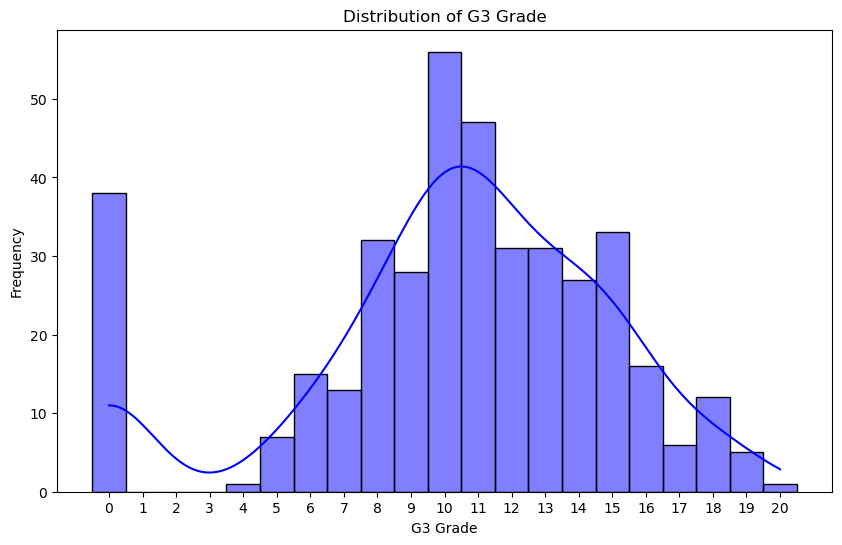

In [10]:
#plot G3 grade 
plt.figure(figsize=(10, 6))
plt.title('Distribution of G3 Grade')

sns.histplot(data['G3'], kde=True, color='blue', binwidth=1,
             binrange=(data['G3'].min() - 0.5, data['G3'].max() + 0.5))

plt.xlabel('G3 Grade')
plt.ylabel('Frequency')

plt.xticks(np.arange(int(data['G3'].min()), int(data['G3'].max())+1, 1))
plt.show()

Number of pass student in final exam: (0 is fail) pass
1    209
0    190
Name: count, dtype: int64


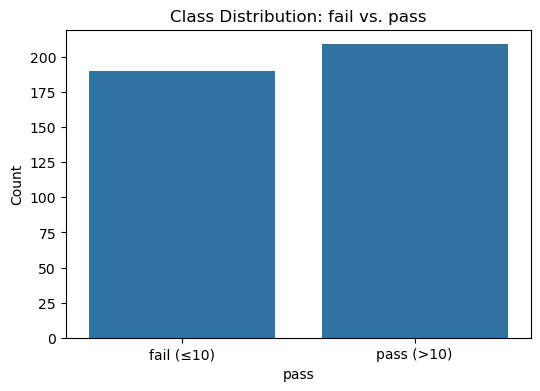

In [ ]:

data['pass'] = (data['G3'] > 10).astype(int)

print('Number of pass student in final exam: (0 is fail)',data['pass'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='pass', data=data)
plt.xticks([0,1], ['fail (≤10)','pass (>10)'])
plt.title('Class Distribution: fail vs. pass')
plt.ylabel('Count')
plt.show()


**Comment:** Ta thấy dữ liệu target phân phối cân bằng giữ 2 class phân loại

Distribution of numeric features

Summary of skewness and kurtosis:
            skewness   kurtosis
age         0.448546  -0.038910
Medu       -0.333271  -1.088803
Fedu       -0.046846  -1.210941
traveltime  1.621861   2.397222
studytime   0.636576   0.016863
failures    2.404415   5.096647
famrel     -0.956133   1.131002
freetime   -0.157007  -0.278945
goout       0.135483  -0.777294
Dalc        2.206872   4.840804
Walc        0.621301  -0.764899
health     -0.505708  -0.991303
absences    3.679777  21.822039
G1          0.258745  -0.691440
G2         -0.407387   0.586042


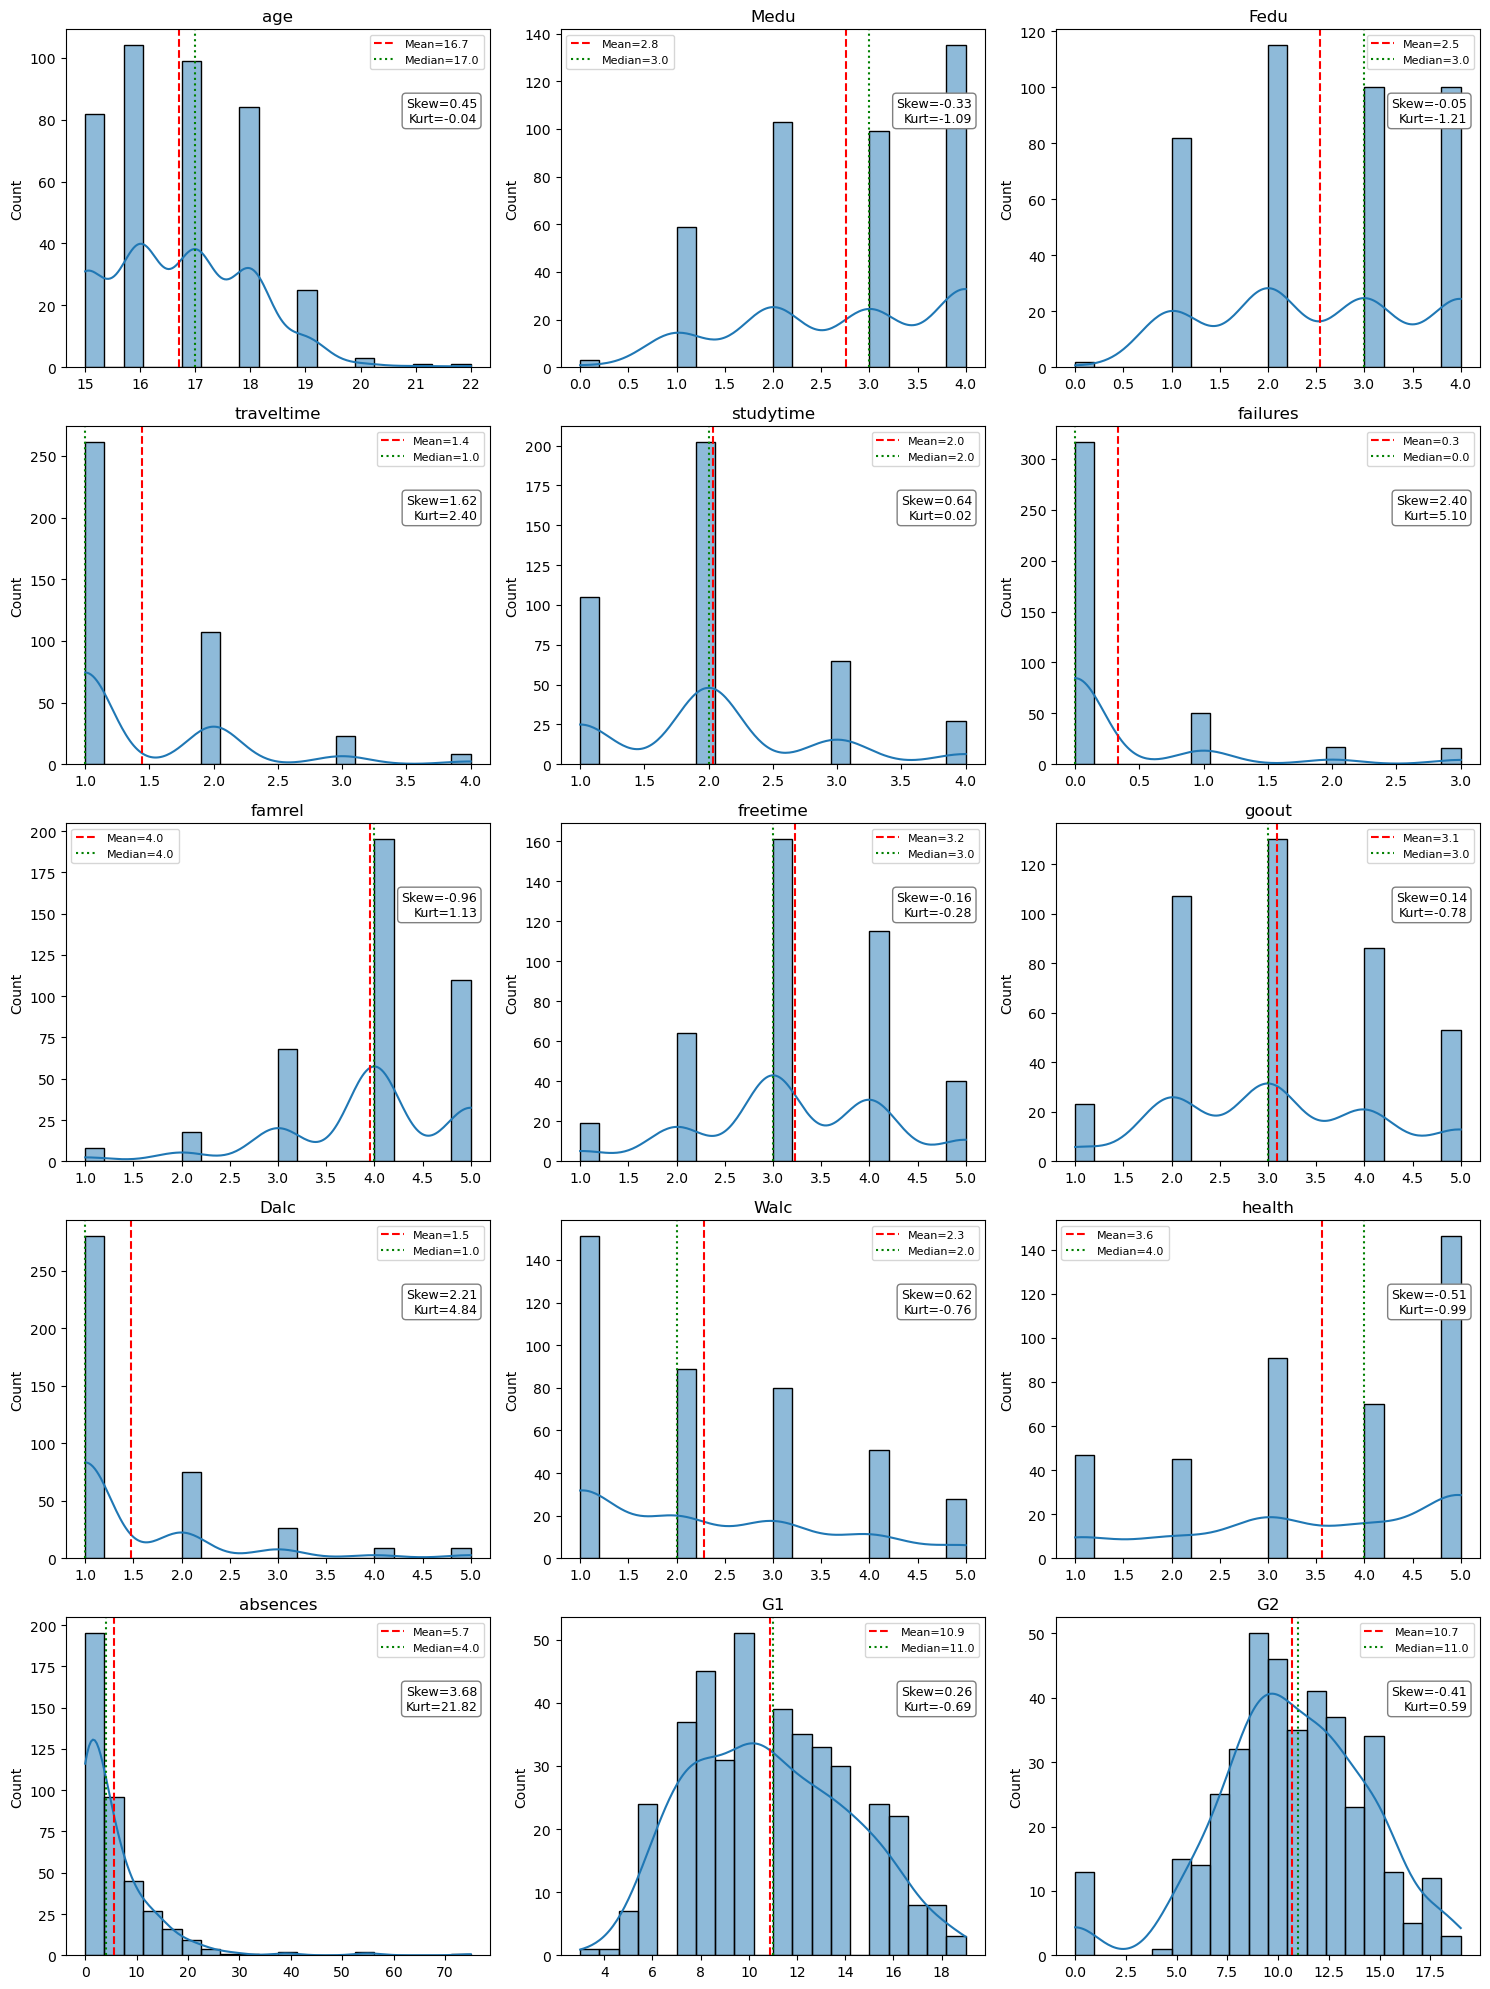

In [25]:
import math

num_cols = data.select_dtypes(include='int64').drop(columns=['G3','pass'], errors='ignore').columns.tolist()

#  skewness & kurtosis
skew_kurt = pd.DataFrame({
    'skewness': data[num_cols].skew(),
    'kurtosis': data[num_cols].kurtosis()
})
print("Summary of skewness and kurtosis:")
print(skew_kurt)

n = len(num_cols)
cols = 3
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flat

for ax, col in zip(axes, num_cols):
    sns.histplot(data[col], kde=True, bins=20, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    
   
    mean = data[col].mean()
    median = data[col].median()
    skew = data[col].skew()
    kurt = data[col].kurtosis()
    
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean={mean:.1f}')
    ax.axvline(median, color='green', linestyle=':', label=f'Median={median:.1f}')
    
    ax.text(
        0.97, 0.8,
        f"Skew={skew:.2f}\nKurt={kurt:.2f}",
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray")
    )
    ax.legend(fontsize=8)

for i in range(n, rows*cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Comment:** Ta thấy đa số các biến số có phân phối đối xứng. chỉ có một vài biến số lệch như: traveltime có phân phối Lệch phải khá mạnh, đuôi dài — nhiều học sinh có thời gian đi học rất cao. failures Lệch phải rất mạnh, đuôi rất dày — đa số học sinh không trượt, một số ít trượt nhiều lần. absences Cực kỳ lệch phải và có nhiều outlier— một số bạn nghỉ rất nhiều ngày.

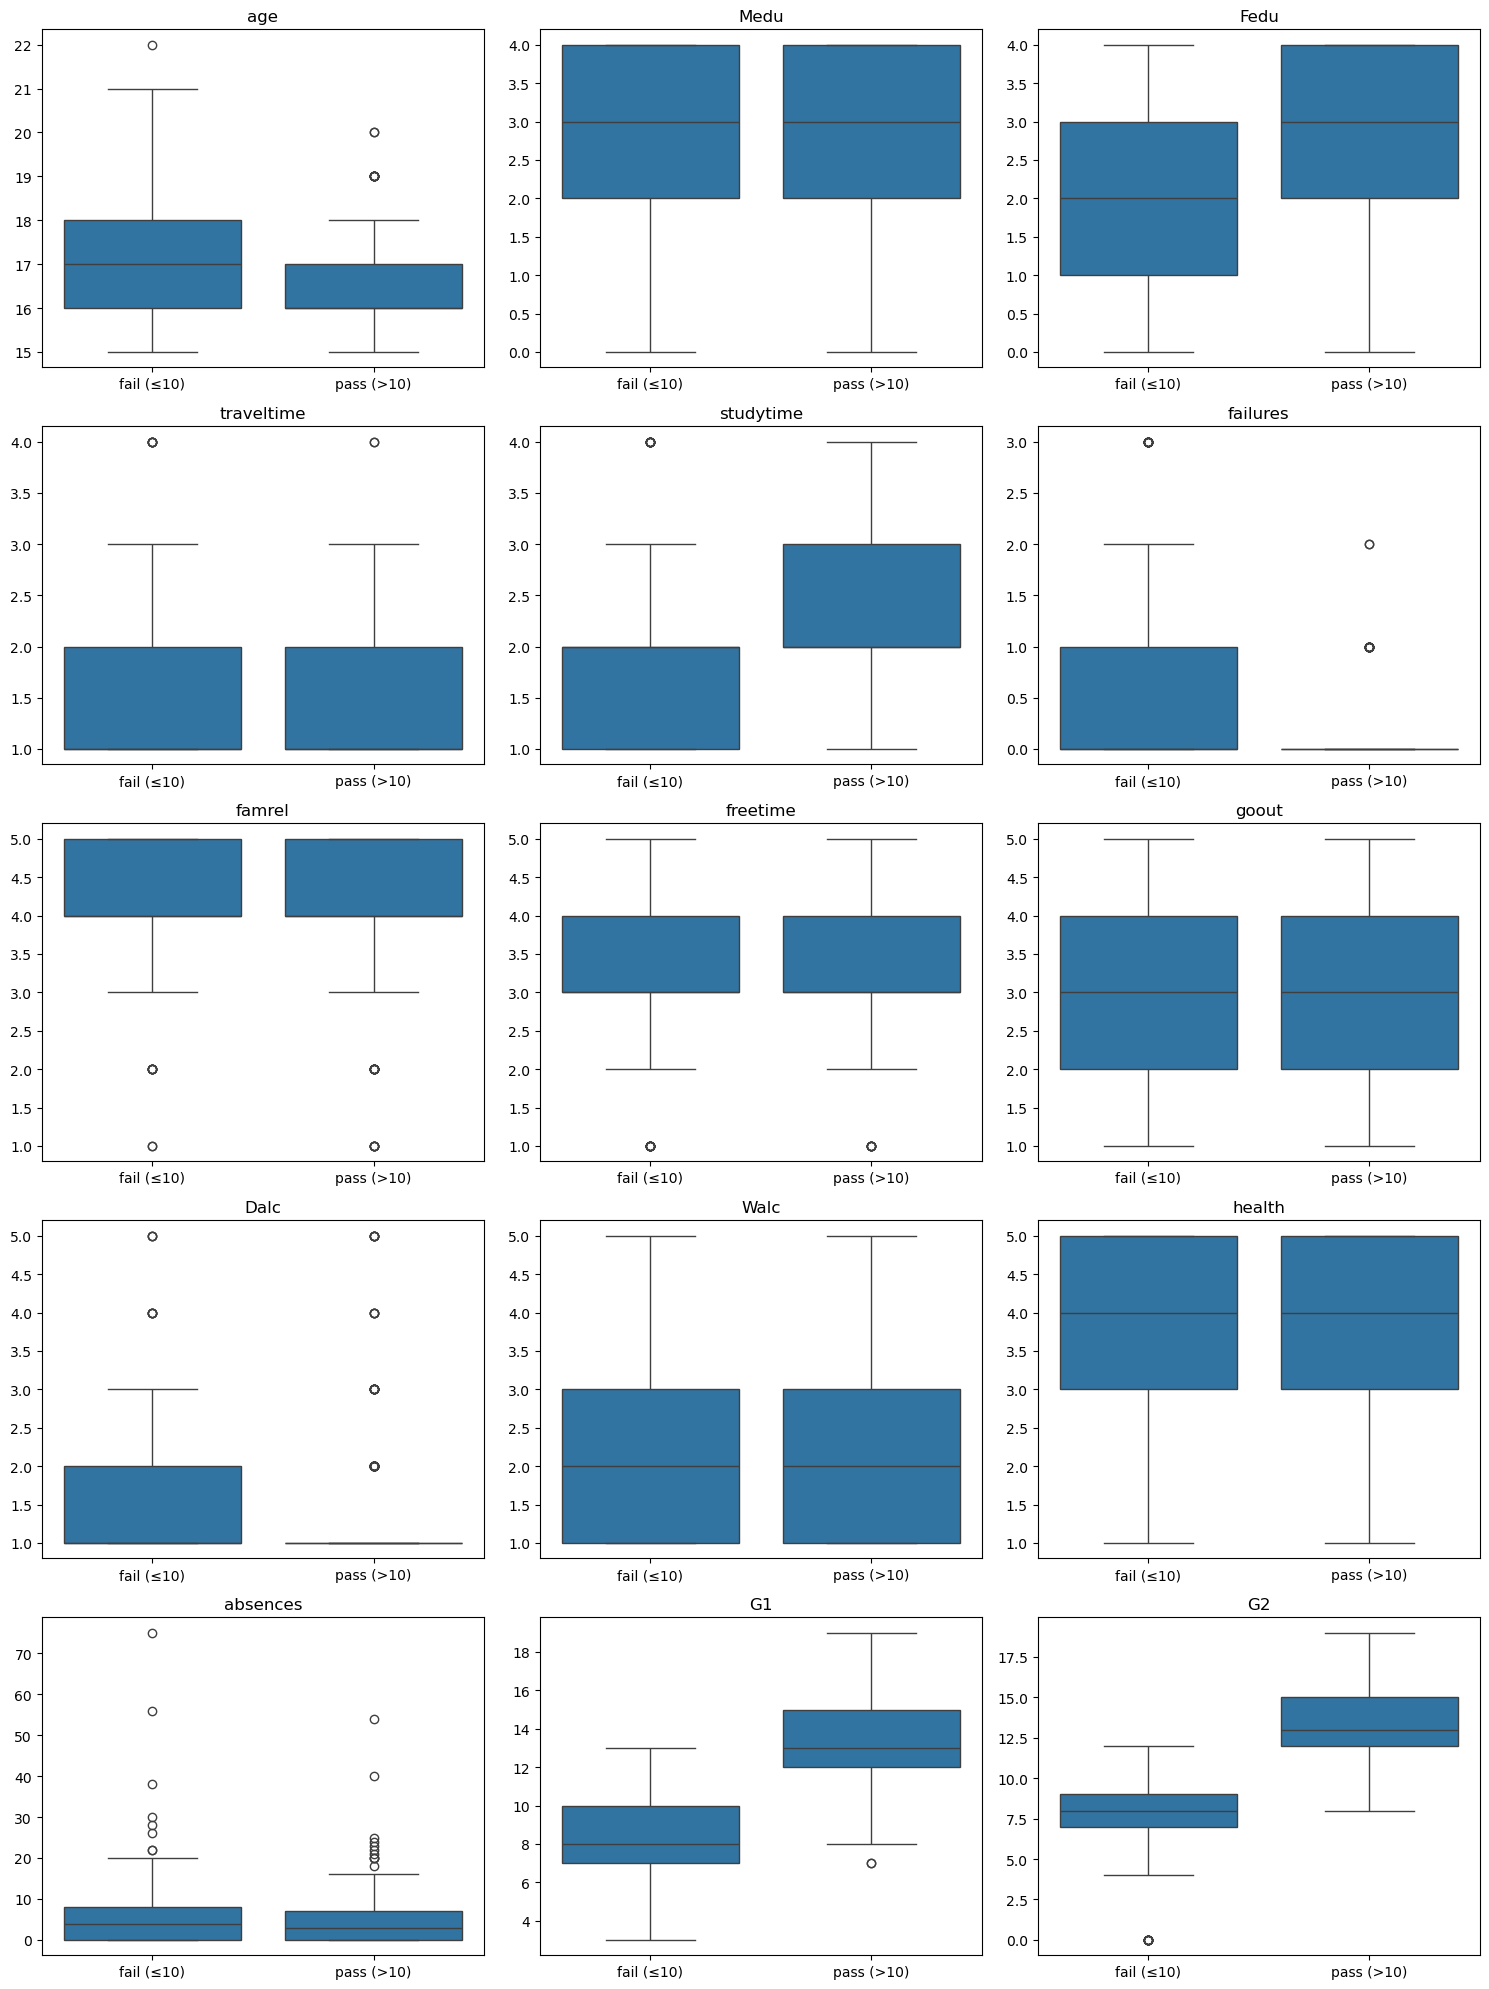

In [26]:
num_cols = data.select_dtypes(include='int64').drop(columns=['G3','pass'], errors='ignore').columns.tolist()

n = len(num_cols)
cols = 3               
rows = math.ceil(n/cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flat


for ax, col in zip(axes, num_cols):
    sns.boxplot(x='pass', y=col, data=data, ax=ax)
    ax.set_xticks([0,1])
    ax.set_xticklabels(['fail (≤10)', 'pass (>10)'])
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')

for i in range(n, rows*cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Comment:** Dựa vào biểu đồ boxlot so sánh giữa các thuộc tính pass và fail ta có thể thấy sơ bộ đa số các feature đều có giá trị trung bình như nhau giữa fail và pass điều này chứng tỏ các feature này là như nhau với dữ liệu của các bạn pass và các bạn fail. có thể kết luận sơ bộ các feature này có thể không đóng góp gì nhiều đối với kết quả fail và pass của các bạn. Bên cạnh đó có các biểu đồ của một số feature có sự chênh lệch rõ như G1, G2, Studytime có thể các feature này sẽ mang ý nghĩa. 

In [28]:
from scipy.stats import ttest_ind, mannwhitneyu

results = []
for col in num_cols:
    grp0 = data.loc[data['pass']==0, col]
    grp1 = data.loc[data['pass']==1, col]
  
    stat, p = ttest_ind(grp0, grp1, nan_policy='omit')
    
    results.append((col, p))


significant = [col for col,p in results if p < 0.05]
print("Numeric variables with p-value < 0.05:", significant)


Numeric variables with p-value < 0.05: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'goout', 'Walc', 'G1', 'G2']


**Comment:** Từ các biến có p-value <0.05> ta có thể biết được các biến như absences, Dalc, famrel không có ý nghĩa thống kê đối với dữ liệu target. Nhưng câu hỏi tại sao lại có nhiều biến có ý nghĩa với target như vậy nhưng trên boxplot lại không nhận thấy sự khác biệt. Giải thich hợp lý có thể do số lượng dữ liệu (n=399) là khá ít và sự khác biệt nhỏ giữa 2 giá trị trung bình của biến đó với đặc trưng fail và pass cũng đủ khiến p-value >0.05. Vậy nên nếu muốn xác định dữ liệu có mối tương quan mạnh như thế nào cần phương phap khác. ở đây nhóm đề xuất sử dụng Cohen’s d và Absolute correlation. 

In [29]:
def cohen_d(x, y):
    """Compute Cohen's d for two 1D arrays."""
    nx, ny = len(x), len(y)
    sx, sy = x.std(ddof=1), y.std(ddof=1)
    # pooled standard deviation
    pooled = np.sqrt(((nx-1)*sx**2 + (ny-1)*sy**2) / (nx+ny-2))
    return (x.mean() - y.mean()) / pooled

num_cols = data.select_dtypes(include='int64').drop(columns=['G3','pass']).columns

grp_fail = data[data['pass']==0]
grp_pass = data[data['pass']==1]

effects = {col: abs(cohen_d(grp_pass[col], grp_fail[col])) for col in num_cols}
effects = pd.Series(effects).sort_values(ascending=False)

print("Cohen's d (absolute) sorted:")
print(effects)


Cohen's d (absolute) sorted:
G2            2.332734
G1            2.310316
failures      0.674149
age           0.328096
Fedu          0.315227
Medu          0.303321
goout         0.286221
traveltime    0.257741
Walc          0.254445
studytime     0.201314
Dalc          0.130574
absences      0.097147
famrel        0.051084
health        0.027625
freetime      0.002884
dtype: float64


In [30]:
num_cols = data.select_dtypes(include='int64').drop(columns=['G3','pass'], errors='ignore').columns

corr_with_pass = data[num_cols].corrwith(data['pass']).abs().sort_values(ascending=False)

print("Absolute correlation with 'pass':")
print(corr_with_pass)

Absolute correlation with 'pass':
G2            0.759617
G1            0.756503
failures      0.319812
age           0.162101
Fedu          0.155901
Medu          0.150148
goout         0.141858
traveltime    0.127987
Walc          0.126376
studytime     0.100288
Dalc          0.065238
absences      0.048583
famrel        0.025569
health        0.013830
freetime      0.001444
dtype: float64


**Comment:** Ta thấy kết quả khá tương đồng giữa 2 thang đo. qua đó có thể kết luận rằng các biến có ảnh hưởng lớn đến target có thể kể đến như G1,G2. biến failures cũng có ảnh hưởng nhưng không lớn bằng G1,G2. Bên cạnh đó các biến age, Fedu, Medu, goout, traveltime, Walc cũng gây hiệu ứng nhỏ đối với kết quả dự đoán. 

Tuy nhiên so với dữ liệu boxplot có thấy sự khác biệt về studytime giữa nhóm pass và fail nhưng khi thực hiện kiểm tra độ tương quan thì lại thấy sự tương quan thấp đến kết quả. Điều này vần cho thấy học sinh dành nhiều thời gian học hơn thì có xu hướng “pass” nhiều hơn, nhưng khác biệt không quá rõ ràng như G1/G2. Nhưng có thể nhiều bạn tuy ít giờ luyện ở nhà nhưng vẫn có G1/G2 cao do học tốt trên lớp và thời gian học không phải cứ nhiều là hiệu quả.

Vậy đối với các dữ liệu numeric thì chúng ta đã có những thông tin tổng quan cũng như độ ảnh hưởng của chúng đối với target

**Next, let's analyze the categorical features.**

In [31]:
# Tạo list các biến object
cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"{col} value counts:")
    print(data[col].value_counts(normalize=True) * 100)
    print("-" * 40)


school value counts:
school
GP    87.468672
MS    12.531328
Name: proportion, dtype: float64
----------------------------------------
sex value counts:
sex
F    52.130326
M    47.869674
Name: proportion, dtype: float64
----------------------------------------
address value counts:
address
U    77.944862
R    22.055138
Name: proportion, dtype: float64
----------------------------------------
famsize value counts:
famsize
GT3    71.428571
LE3    28.571429
Name: proportion, dtype: float64
----------------------------------------
Pstatus value counts:
Pstatus
T    89.724311
A    10.275689
Name: proportion, dtype: float64
----------------------------------------
Mjob value counts:
Mjob
other       35.338346
services    25.814536
teacher     15.538847
at_home     14.786967
health       8.521303
Name: proportion, dtype: float64
----------------------------------------
Fjob value counts:
Fjob
other       54.636591
services    28.320802
teacher      7.268170
at_home      5.263158
health       4

**Comment:** Ta thấy được đa số học sinh học ở GP và sống ở thành thị (Urban) và có số lượng thành viên trong gia đình >3 và đa số đều muốn học cao hơn (higher)

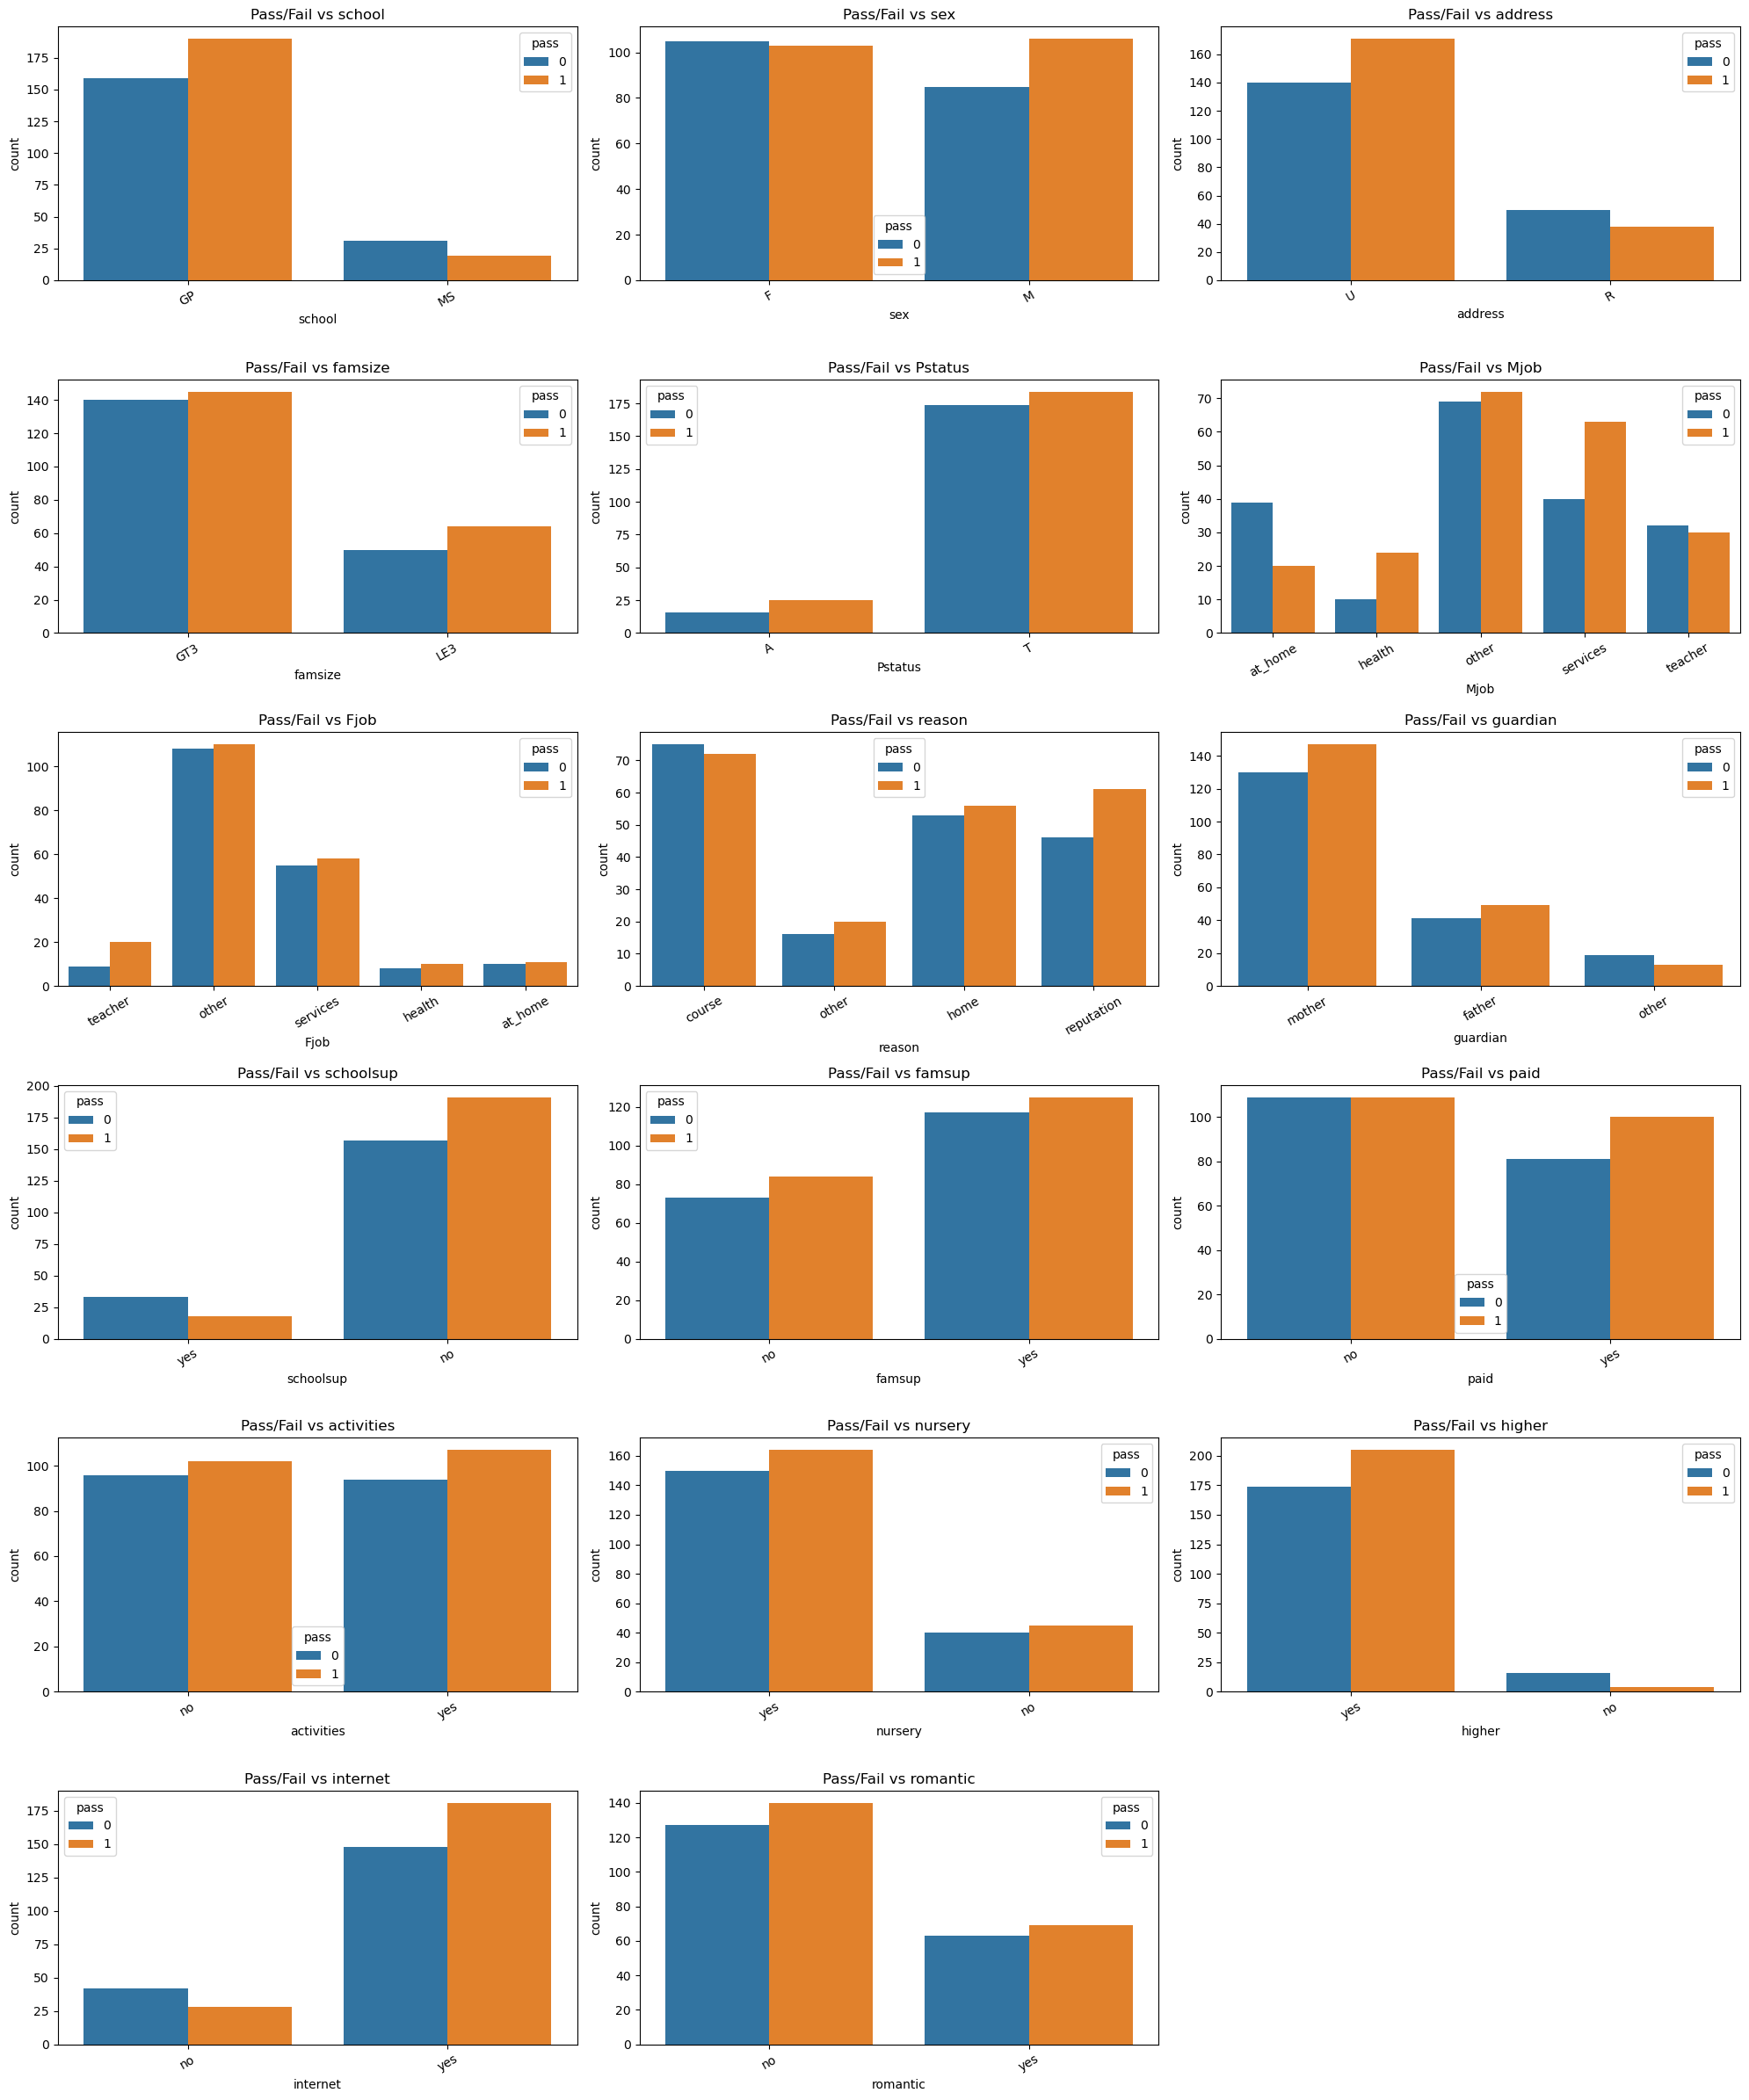

In [32]:
n_cols = 3
n_rows = int(np.ceil(len(cat_cols) / n_cols))
plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=data, x=col, hue='pass')
    plt.title(f"Pass/Fail vs {col}")
    plt.xticks(rotation=30)
    plt.tight_layout()


**Comment:** Chung ta có thể thấy không co sự khác biệt rõ nào đến từ sự tương quan fail pass với các thuộc tính chứng tỏ không có sự khác biện rõ rệt đến target

In [33]:
from scipy.stats import chi2_contingency

significant_cat = []

for col in cat_cols:
    contingency = pd.crosstab(data[col], data['pass'])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col}: p-value = {p:.4f}")
    if p < 0.05:
        significant_cat.append(col)

print("\nBiến phân loại có liên hệ thống kê với target (p < 0.05):")
print(significant_cat)


school: p-value = 0.0428
sex: p-value = 0.2739
address: p-value = 0.0663
famsize: p-value = 0.4009
Pstatus: p-value = 0.3182
Mjob: p-value = 0.0027
Fjob: p-value = 0.4564
reason: p-value = 0.6170
guardian: p-value = 0.3717
schoolsup: p-value = 0.0137
famsup: p-value = 0.7957
paid: p-value = 0.3450
activities: p-value = 0.8077
nursery: p-value = 1.0000
higher: p-value = 0.0060
internet: p-value = 0.0314
romantic: p-value = 1.0000

Biến phân loại có liên hệ thống kê với target (p < 0.05):
['school', 'Mjob', 'schoolsup', 'higher', 'internet']


In [34]:

def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    r, k = table.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

cramers_results = {col: cramers_v(data[col], data['pass']) for col in cat_cols}
cramers_sorted = pd.Series(cramers_results).sort_values(ascending=False)
print("\nCramér's V for categorical variables:")
print(cramers_sorted)



Cramér's V for categorical variables:
Mjob          0.201994
higher        0.137440
schoolsup     0.123458
internet      0.107751
school        0.101410
Fjob          0.095563
address       0.091927
guardian      0.070429
reason        0.066986
sex           0.054772
Pstatus       0.049974
paid          0.047279
famsize       0.042053
famsup        0.012963
activities    0.012187
nursery       0.000000
romantic      0.000000
dtype: float64


**Comment:** Thông qua Chi‑squared ta thấy được một số biến có ý nghĩa thống kê với target nhưng thông qua thang đo Cramér's V lại thấy sự tương quan khá thấp. Điều này là hợp lý vì so với biểu đồ so sánh ở trên cũng nêu ra không có sự chênh lệch về tỉ lệ fail pass đối với các thuộc tính. 

**Vậy nên các feature để đưa vào mô hình là:**

In [ ]:
selected_features = [
    'G1', 'G2', 'failures', 'age', 'Fedu', 'Medu',
    'goout', 'traveltime', 'Walc'
]

Nhưng dựa vào biểu đồ boxlot ban đầu cùng thang đo skewness và kurtosis chứng tỏ dữ liệu cột failures và traveltime đang lệch và cần thiết xử lý trước khi đưa vào mô hình.